# EDA automático

In [3]:
#!pip install sweetviz
#!pip install seaborn

In [4]:
# Importar librerías necesarias
import sweetviz as sv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Auto EDA de tidy_agricultura_ganadería_pesca

In [5]:
# Cargar tus datos
agp_df = pd.read_csv('../data/tidy_agricultura_ganaderia_pesca.csv', parse_dates=['ANO'])
imss_df = pd.read_csv('../data/tidy_imss.csv', parse_dates=['año'])


In [6]:
# Crear el informe Sweetviz
informe_eda_AGP = sv.analyze(agp_df)

# Mostrar el informe en el navegador
informe_eda_AGP.show_html('informe_eda_AGP.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report informe_eda_AGP.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 2. Auto EDA de tidy_imss

In [7]:
# Crear el informe Sweetviz
informe_eda_imss = sv.analyze(imss_df)

# Mostrar el informe en el navegador
informe_eda_imss.show_html('informe_eda_IMSS.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report informe_eda_IMSS.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. Datos faltantes

De los auto EDA podemos notar que: 
- Para el caso de la tabla de agricultura/ganadería/pesca no tenemos niungún dato faltante.
- En la tabla de empleos generados del IMSS tenemos 660 datos faltantes (menos del 1% de los datos) en la columna de rango salarial.

En esta sección exploraremos los datos faltantes de IMSS.

In [8]:
# Explorar el dataframe
imss_df.head()

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion
0,W2,6,0,2006-01-01,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
1,W2,6,0,2006-01-01,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
2,W2,3,0,2006-01-01,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
3,W2,6,0,2006-01-01,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 30 y menor a 35 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
4,W2,5,0,2006-01-01,1,2006-01-01,SAN LUIS RÍO COLORADO,Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 35 y menor a 40 años de edad,mayor a 1 y hasta 2 veces el salario mínimo


In [9]:
# Conteo de valores de rango salarial
conteo_por_categoria = imss_df['rango_salarial'].value_counts(dropna=False)
conteo_por_categoria

rango_salarial
W2     571465
W3     299911
W4     188141
W5     127326
W6      87671
W7      64509
W8      48735
W9      34964
W10     26323
W11     19930
W12     15881
W13     12673
W14     11608
W25     10113
W16      9058
W15      8030
W18      5868
W17      5249
W1       4277
W21      3997
W19      3712
W20      3562
NaN      3531
W24      3456
W23      3415
W22      2854
Name: count, dtype: int64

In [10]:
# Contar datos faltantes
imss_df['rango_salarial'].isna().sum()

3531

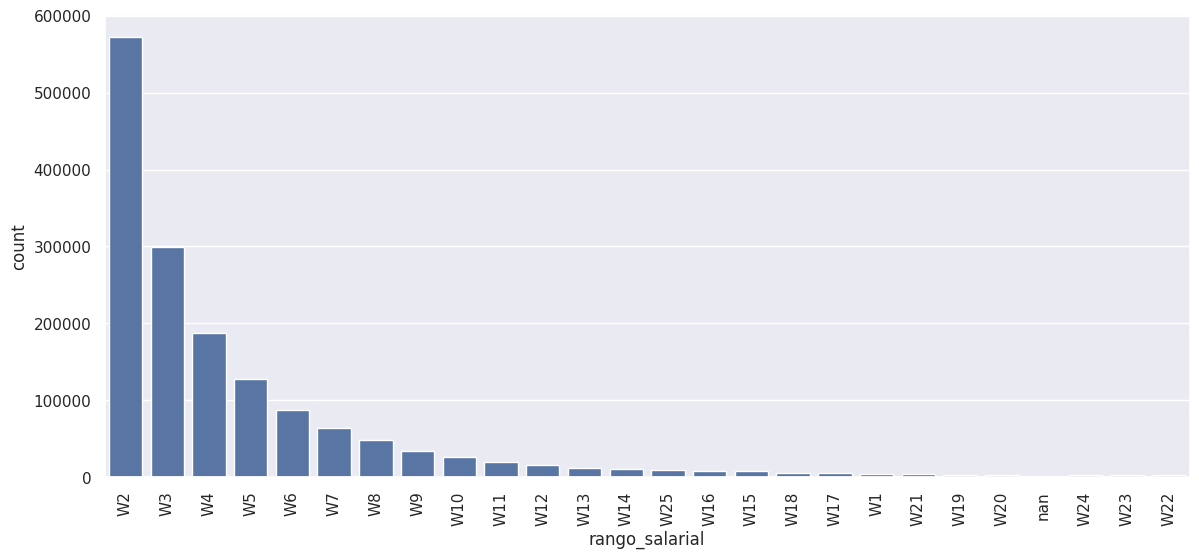

In [11]:
# Visualizar la frecuencia de cada categoría
# Ordenamos las categorías por el conteo de mayor a menor
orden_categorias = conteo_por_categoria.index

# Creamos el gráfico de barras con el orden especificado
sns.set_theme()
plt.figure(figsize=(14, 6))  # Ajustar el tamaño 
ax = sns.countplot(x='rango_salarial', data=imss_df, order=orden_categorias)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x 

plt.show()